# Create Mask for ECCO Modeling Utilities (EMU)

This notebook describes how to create a mask for EMU.

- [Example 1](#example-1-create-a-2d-mask-for-the-box-mean-ssh-in-the-nino-34-box-weighted-by-grid-cell-area) Create a 2d mask for the box-mean SSH in the NINO 3.4 box, weighted by grid cell area

- [Example 2](#example-2-create-a-very-similar-mask-but-for-ssh-anomaly-relative-to-the-global-mean-sea-level) Create a very similar mask but for ***SSH anomaly relative to the global mean sea level***

- [Example 3](#example-3-create-a-3d-mask-for-the-box-mean-theta-in-the-nino-34-box-between-20-and-60-meters-weighted-by-grid-cell-volume) Create a 3D mask for the box-mean THETA in the NINO 3.4 box between 20 and 60 meters, weighted by grid cell volume

- [Example 4](#example-4-create-transect-masks-for-transport) Create transect masks for transport

- [Example 5](#example-5-create-a-basin-mask-for-pacific) Create a basin mask for Pacific

## Load modules 

In [1]:
import sys
from os.path import join,expanduser
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

#user_home_dir = expanduser('~')
#sys.path.append(join(user_home_dir,'ECCOv4-py'))
import ecco_v4_py as ecco
#sys.path.append(join(user_home_dir,'ECCO-v4-Python-Tutorial'))
#import ecco_access as ea

## Load grid

In [2]:
# Load grid 
#ShortNames_list = ["ECCO_L4_GEOMETRY_LLC0090GRID_V4R4"]
#ecco_grid = xr.open_dataset(ShortNames_list[0])
ecco_grid = xr.open_dataset('/efs_ecco/ECCO/V4/r4/ECCO_L4_GEOMETRY_LLC0090GRID_V4R4/GRID_GEOMETRY_ECCO_V4r4_native_llc0090.nc')
ecco_grid.load()

<xarray.Dataset> Size: 89MB
Dimensions:  (i: 90, i_g: 90, j: 90, j_g: 90, k: 50, k_u: 50, k_l: 50,
              k_p1: 51, tile: 13, nb: 4, nv: 2)
Coordinates: (12/20)
  * i        (i) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * i_g      (i_g) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j        (j) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j_g      (j_g) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * k        (k) int32 200B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * k_u      (k_u) int32 200B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
    ...       ...
    Zp1      (k_p1) float32 204B 0.0 -10.0 -20.0 ... -5.678e+03 -6.134e+03
    Zu       (k_u) float32 200B -10.0 -20.0 -30.0 ... -5.678e+03 -6.134e+03
    Zl       (k_l) float32 200B 0.0 -10.0 -20.0 ... -5.244e+03 -5.678e+03
    XC_bnds  (tile, j, i, nb) float32 2MB -115.0 -115.0 -107.9 ... -115.0 -108.5
    YC_bnds  (tile, j, i, nb) float32 2MB -88.18 -88.32 -88.3 ... -88.18 -88.16
    Z_bnds   (k, nv) float32 400B 0.0 -10.0 -10.0 ... -5.678e+03 -6.134e+03
Dimensions without coordinates: nb, nv
Data variables: (12/21)
    CS       (tile, j, i) float32 421kB 0.06158 0.06675 ... -0.9854 -0.9984
    SN       (tile, j, i) float32 421kB -0.9981 -0.9978 ... -0.1705 -0.05718
    rA       (tile, j, i) float32 421kB 3.623e+08 3.633e+08 ... 3.611e+08
    dxG      (tile, j_g, i) float32 421kB 1.558e+04 1.559e+04 ... 2.314e+04
    dyG      (tile, j, i_g) float32 421kB 2.321e+04 2.327e+04 ... 1.558e+04
    Depth    (tile, j, i) float32 421kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    ...       ...
    hFacC    (k, tile, j, i) float32 21MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    hFacW    (k, tile, j, i_g) float32 21MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    hFacS    (k, tile, j_g, i) float32 21MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    maskC    (k, tile, j, i) bool 5MB False False False ... False False False
    maskW    (k, tile, j, i_g) bool 5MB False False False ... False False False
    maskS    (k, tile, j_g, i) bool 5MB False False False ... False False False
Attributes: (12/58)
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Ian Fenty and Ou Wang
    cdm_data_type:                   Grid
    comment:                         Fields provided on the curvilinear lat-l...
    Conventions:                     CF-1.8, ACDD-1.3
    coordinates_comment:             Note: the global 'coordinates' attribute...
    ...                              ...
    references:                      ECCO Consortium, Fukumori, I., Wang, O.,...
    source:                          The ECCO V4r4 state estimate was produce...
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    summary:                         This dataset provides geometric paramete...
    title:                           ECCO Geometry Parameters for the Lat-Lon...
    uuid:                            87ff7d24-86e5-11eb-9c5f-f8f21e2ee3e0

### Save some fields to numpy arrarys

In [3]:
# Get the model grid longitude and latitude
XC = ecco_grid.XC.values # modle grid longitude (13x90x90) 
YC = ecco_grid.YC.values # latitudes
# Also grid cell areaa in (m^2)
rA = ecco_grid.rA.values
maskC = ecco_grid.maskC.values # 3d mask (0/1) for model grid (tracer point)
maskCSurf = maskC[0] # maskC at surface level (level = 1)
hFacC = ecco_grid.hFacC.values # 3d non-dim factors (0-1) reflecing model cell geometry in vertical direction. Partial cells have values >0 but <1.
Zl = ecco_grid.Zl.values # depth of vertical cell face: between 0 and -5678 meters
Z  = ecco_grid.Z.values # depth of vertical cell ceter: between -10 and -5906 meters
drF = ecco_grid.drF.values # layer thickness (m); 1d with 50 elements

# More fields for the western and southern faces of grid cells. U is on the west face and V is on the southern face.
# They are the same as the fields above (C for tracer points at the center of grid cells).
# We need these fields for creating transport masks
maskW = ecco_grid.maskW.values # 3d mask (0/1) for model grid (U point)
maskWSurf = maskW[0] # maskW at surface level (level = 1)
hFacW = ecco_grid.hFacW.values 

maskS = ecco_grid.maskS.values # 3d mask (0/1) for model grid (V point)
maskSSurf = maskS[0] # maskS at surface level (level = 1)
hFacS = ecco_grid.hFacS.values 

# dxG and dyG are the horizontal grid spacing (meters) for the western and southern faces, respectively.
dxG = ecco_grid.dxG.values
dyG = ecco_grid.dyG.values

## Example 1: Create a 2d mask for the box-mean SSH in the NINO 3.4 box, weighted by grid cell area

### Specify latitude and longitude ranges

In [4]:
# Example: Create a 2d mask for the box-mean SSH in the NINO 3.4 box, weighted by grid cell area
# Specify latitude and longitude ranges
lat1 = -5
lat2 = 5
lon1 = -170
lon2 = -120

### Create a temporary mask that contains 0 for points outside the box and 1 for points inside.

In [5]:
tmp_msk = (XC>=lon1) & (XC<lon2) & (YC>=lat1) & (YC<lat2)

### Calculate mask for EMU 

In [6]:
# Apply grid cell area weight
# First calculate the total area of wet points in the box, 
# where rA is grid cell area, tmp_msk defines the 0/1 mask for the box, and maskCSurf defines wet/dry points.
area_sum = np.sum(rA*tmp_msk*maskCSurf)
# The area weighted mask is just 
mask = rA*tmp_msk*maskCSurf/area_sum

### Plot to check by using ECCOv4-py plot_tiles
For plotting purposes, we set land points to NaN so that they appear as white regions.

(<Figure size 900x789 with 17 Axes>,
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ...,  0.,  0.,  0.],
        [nan, nan, nan, ...,  0.,  0.,  0.],
        [nan, nan, nan, ...,  0.,  0.,  0.]]))

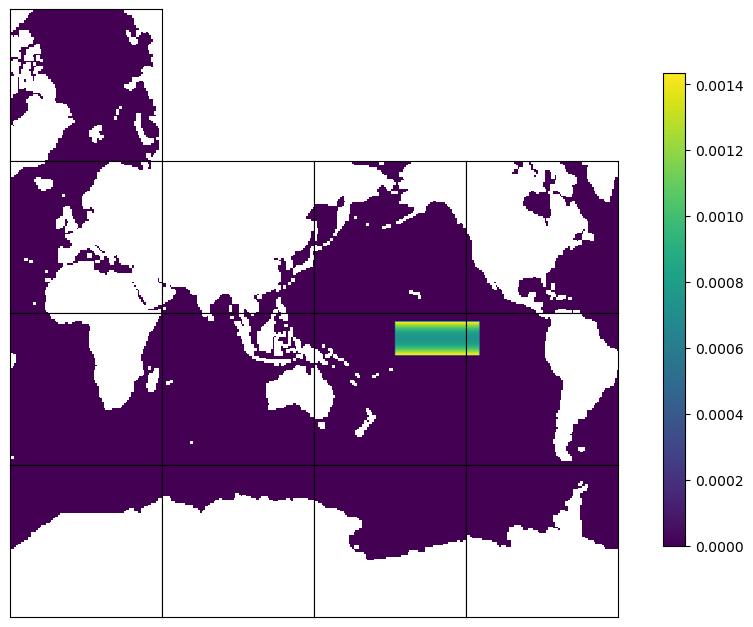

In [7]:
mask_tmpplot = np.copy(mask)
mask_tmpplot[maskCSurf==False] = np.nan
ecco.plot_tiles(mask_tmpplot, rotate_to_latlon=True, layout='latlon', show_tile_labels=False, show_colorbar=True, less_output=True)

### Check the sum of mask and a point outside the NINO 3.4 box
In this case, the sum of the mask should be equal to 1. The mask outside the box is zero. 

In [8]:
print(f'mask at 1,45,50 (tile, j, i): {mask[1,45,45]}')
print(f'Sum of mask: {np.sum(mask)}')

mask at 1,45,50 (tile, j, i): 0.0
Sum of mask: 1.0


### Write mask to a file for EMU to use

In [9]:
# Write out the mask to a file to be used by EMU
# First convert the 13x90x90 to a compact formt 1170x90, which is the format that EMU expects for input files.
mask_c = ecco.llc_tiles_to_compact(mask, less_output=True)

# Assume you have an output directory (repalce USERNAME with your own username). If not, create one. 
# output_dir = '/efs_ecco/USERNAME/mask'
output_dir = '/efs_ecco/owang/EMU/mask'
mask_fn = f'mask2d_{lon1:.1f}_{lon2:.1f}_{lat1:.1f}_{lat2:.1f}.bin'

# Output the mask
mask_c.astype('>f4').tofile(output_dir+'/'+mask_fn)

## Example 2: Create a very similar mask but for ***SSH anomaly relative to the global mean sea level***
This mask is the same as the previous example, except that SSH now is anomlay relative to the global mean sea level. So, we are going to create the mask for the box-mean ***SSH anomaly***, relative to the global mean sea level, in the NINO 3.4 box, weighted by grid cell area. We will use many variables that were computed in the previous example.

### Create mask

In [10]:
# global surface ocean area 
gso_area_sum = np.sum(rA*maskCSurf)

# Note the second term on LHS, which is needed to remove the global mean sea level.
mask_ano = rA*tmp_msk*maskCSurf/area_sum - rA*maskCSurf/gso_area_sum

### Plot the mask
There are non-zero values outside the NINO 3.4 box. For plotting purposes, we again set land points to NaN so they appear as white regions.

(<Figure size 900x789 with 17 Axes>,
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ...,  0.,  0.,  0.],
        [nan, nan, nan, ...,  0.,  0.,  0.],
        [nan, nan, nan, ...,  0.,  0.,  0.]]))

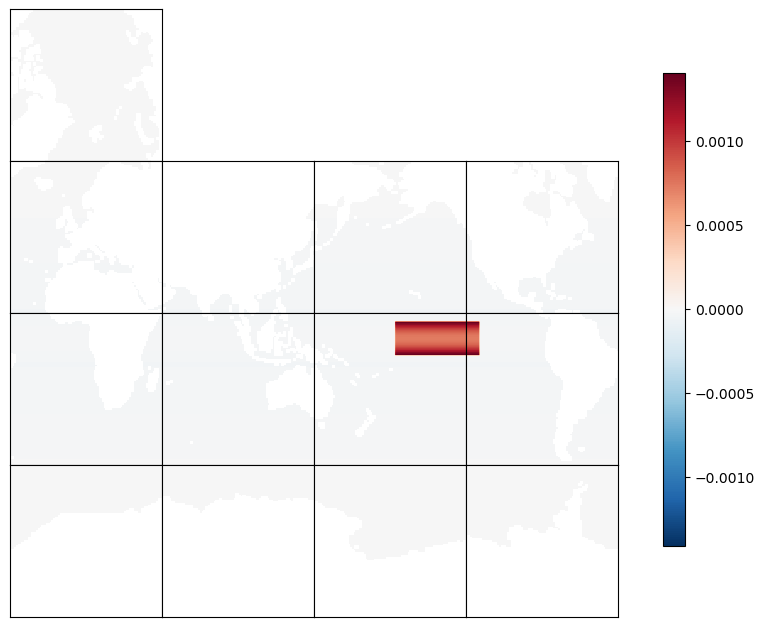

In [11]:
# Plot mask to check by using ECCOv4-py plot_tiles
mask_tmpplot_ano = np.copy(mask_ano)
mask_tmpplot_ano[maskCSurf==False] = np.nan
ecco.plot_tiles(mask_tmpplot_ano, rotate_to_latlon=True, layout='latlon', show_tile_labels=False, show_colorbar=True, less_output=True)

### Check the mask for a point outside of the NINO 3.4 box
The mask outside the box is not zero but contains small values reflecting the local SSH contribution to the global mean sea level.

In [12]:
print(f'mask at 1,45,50 (tile, j, i): {mask_ano[1,45,45]:.2e}')

mask at 1,45,50 (tile, j, i): -2.90e-05


### Write mask to a file for EMU to use

In [13]:
# Write out the mask to a file to be used by EMU
# First convert the 13x90x90 to a compact formt 1170x90, which is the format that EMU expects for input files.
mask_ano_c = ecco.llc_tiles_to_compact(mask_ano, less_output=True)

mask_ano_fn = f'mask2d_regional_ano_{lon1:.1f}_{lon2:.1f}_{lat1:.1f}_{lat2:.1f}.bin'

# Output the mask
mask_ano_c.astype('>f4').tofile(output_dir+'/'+mask_ano_fn)

## Example 3: Create a 3D mask for the box-mean THETA in the NINO 3.4 box between 20 and 60 meters, weighted by grid cell volume

### Depth range 
The longitude and latitude ranges are the same as Examples 1 and 2.

In [14]:
# Depth range in meters. Note that z1 is for the deeper layer and z2 is for the shallower layer, i.e., z1>=z2.
z1 = 60
z2 = 10

### Create a temporary 3d mask that contains 0 for points outside the box and 1 for points inside.

In [15]:
# We will use the 2d 0/1 mask for the NINO 3.4 box. First populate a 3d array with the 2d mask.
tmp_msk3d = np.tile(tmp_msk, (len(drF), 1, 1, 1))
# Vertical range
idxz = (np.abs(Zl)<z1) & (np.abs(Zl)>=z2) 
# mask out vertical levels outside the vertical range
tmp_msk3d[~idxz,:] = 0.

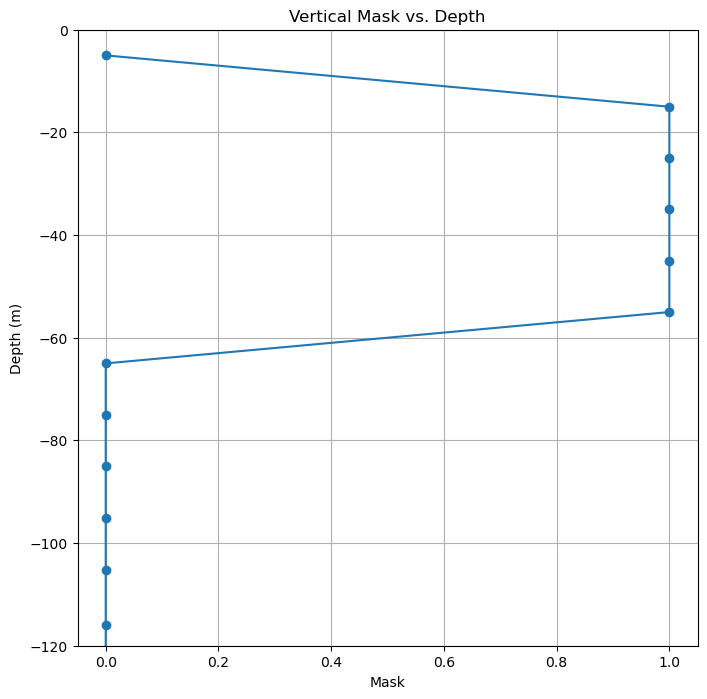

In [16]:
# Plot the vertical mask to check
plt.figure(figsize=(8,8))
plt.plot(idxz, Z, '-o')
plt.title('Vertical Mask vs. Depth')
plt.xlabel('Mask')
plt.ylabel('Depth (m)') 
plt.ylim(-z1*2, 0)
plt.grid()
plt.show()

### Calculate 3d mask

In [17]:
# Apply grid cell volume weight
# Create a 3d array for grid cell volume
vol3d = rA*hFacC*np.expand_dims(drF,axis=(1,2,3)) # product of horizontal area, layer thickness, and layer thickness geometry 
# Calculate the total volume of wet points in the box.
vol3d_boxsum = np.sum(vol3d*tmp_msk3d)
# Volume weighted mask for the block is just 
mask3d = vol3d*tmp_msk3d/vol3d_boxsum

### Plot the mask

Text(0.5, 0.98, '3d mask for level 3')

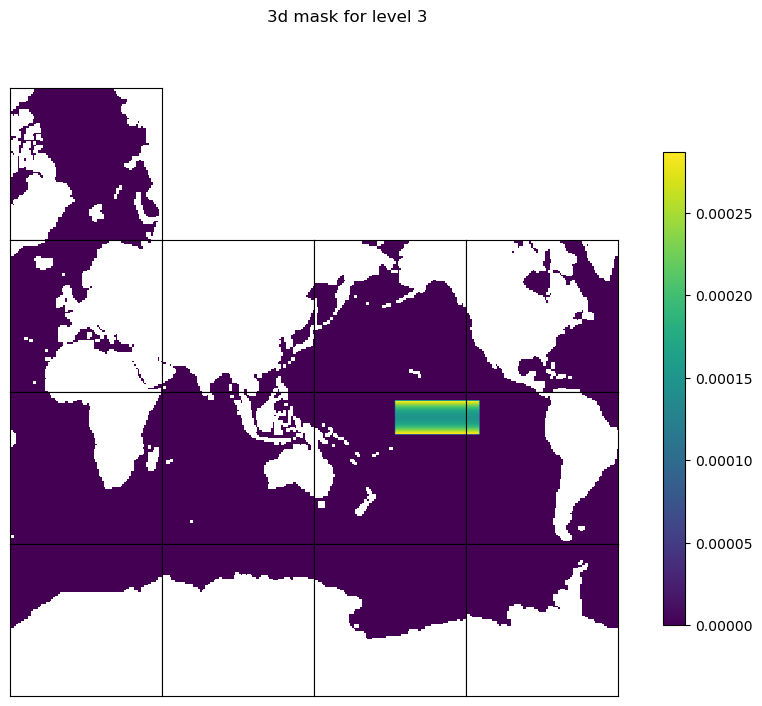

In [18]:
# Plot mask to check by using ECCOv4-py plot_tiles
# Create a temporary mask for plotting and set land points to NaN
mask_tmpplot3d = np.copy(mask3d)
mask_tmpplot3d[maskC==False] = np.nan
# layer 3 
level = 3
fig=ecco.plot_tiles(mask_tmpplot3d[level-1], rotate_to_latlon=True, layout='latlon', show_tile_labels=False, show_colorbar=True, less_output=True)
fig[0].suptitle(f'3d mask for level {level}')

### Write the 3d mask to a file for EMU to use

In [19]:
# Write out the mask to a file to be used by EMU
# First convert the 13x90x90 tile format to the compact formt 1170x90, which is the format that EMU expects for input files.
mask3d_c = ecco.llc_tiles_to_compact(mask3d, less_output=True)

# Specify output filename
mask3d_fn = f'mask3d_{lon1:.1f}_{lon2:.1f}_{lat1:.1f}_{lat2:.1f}_{z1:.1f}_{z2:.1f}.bin'

# Output the mask
mask3d_c.astype('>f4').tofile(output_dir+'/'+mask3d_fn)

llc_faces_to_compact: data_compact array shape (50, 1170, 90)


## Example 4: Create transect masks for transport

This example describes how to create mask files for a transect that can be used by EMU to compute surface-to-bottom transport. The user specifies the latitude and longitude of two points. The example creates two mask files, one for each of the horizontal velocity components, for the transect with the specified latitude and longitude of the two points.

In [20]:
# Specify longitude and latitude of two end points across the North Atlantic between Greenland and Europe
pt1 = [-20, 75] # longitude, latitude
pt2 = [15, 60]

We use ECCOv4-py's ecco.get_section_line_masks to find three masks as 13x90x90 arrays.
Two masks are for the two horizontal velocity components: trxW for U and trxS for V.
The sign convention for trxW and trxS is as follows: if you stand at pt1 and face pt2, 
positive values are to the left of the transect from pt1 to pt2, and negative values are to the right.
There is a third mask, trxC, for tracer points, which is not needed to calcualte transport. But some of the EMU
tools, like the Adjoint Tool, still need it. 

In [21]:
# Find mask by specifying the lon/lat of the two end points
trxC_ds, trxW_ds, trxS_ds = ecco.get_section_line_masks(pt1, pt2, ecco_grid)
# Save to numpy arries
trxC = trxC_ds.values
trxW = trxW_ds.values
trxS = trxS_ds.values

/srv/conda/envs/notebook/lib/python3.11/site-packages/xgcm/grid_ufunc.py:832: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg
/srv/conda/envs/notebook/lib/python3.11/site-packages/xgcm/grid_ufunc.py:832: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg
/srv/conda/envs/notebook/lib/python3.11/site-packages/xgcm/grid_ufunc.py:832: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in orde

### Plot the masks (not area-weighted) to check
We first make a temporary copy and flag land points with NaN for better visualization. We also make the plot layout match the model x- and y-directions, where the positive x-direction runs from left to right and the positive y-direction runs from bottom to top. This layout helps you check whether the sign is as expected.

Text(0.5, 0.98, 'Mask for C')

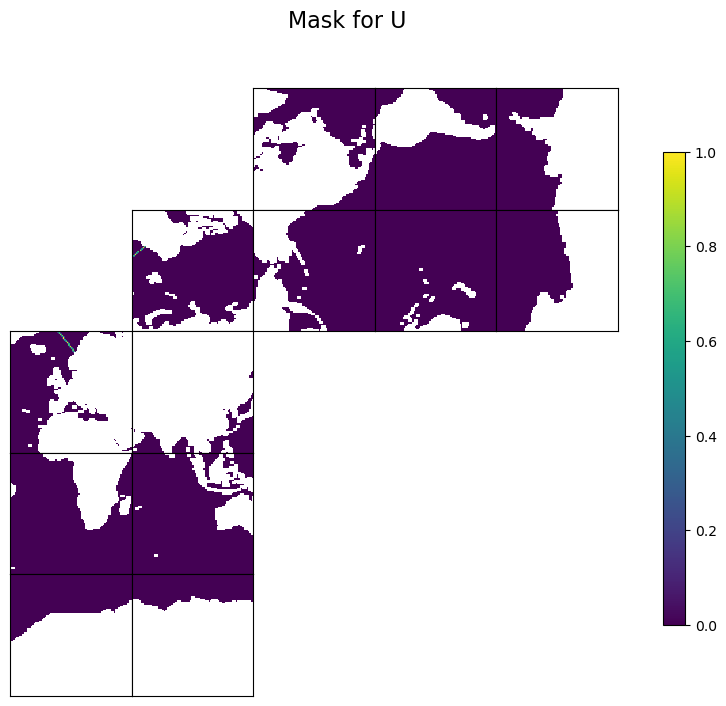

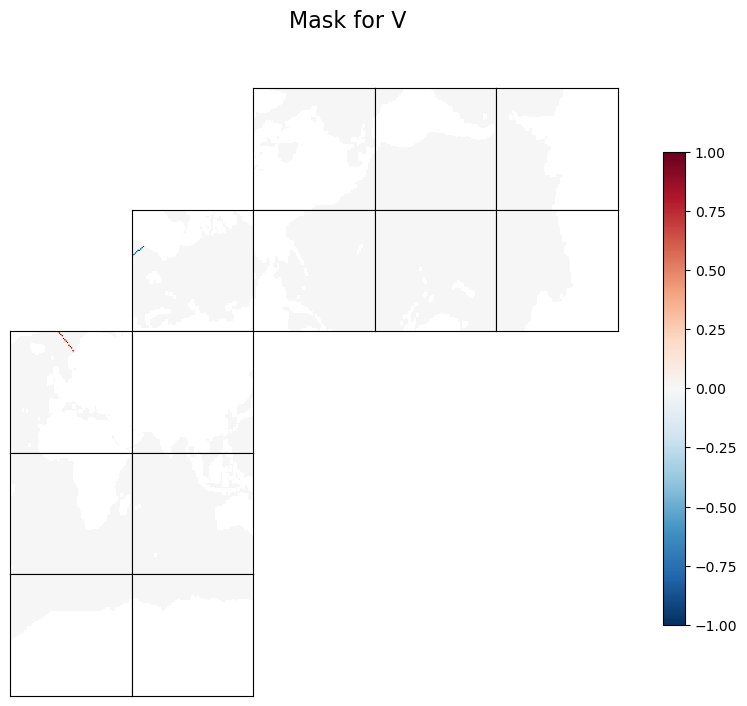

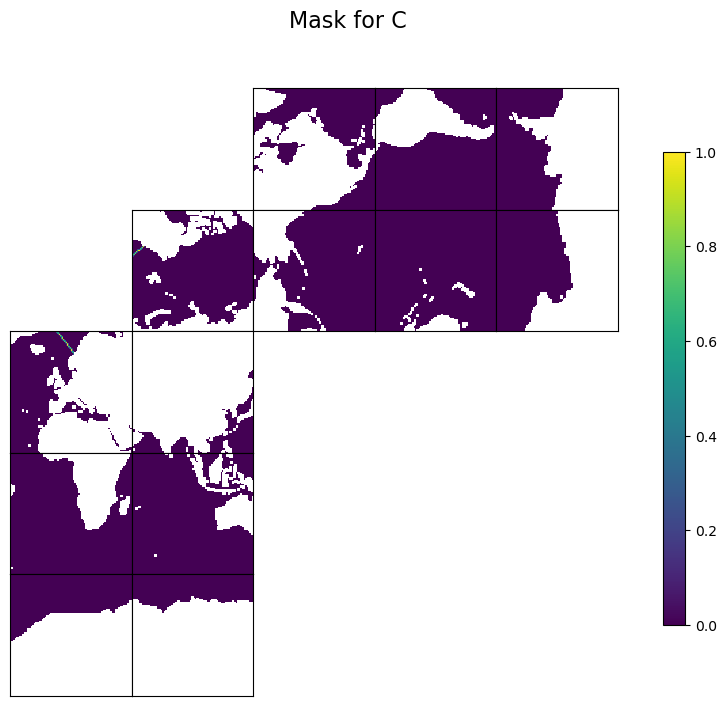

In [22]:
# make a copy and flag land points with NaN for better visualization
tmpW = np.copy(trxW).astype('>f4')
tmpW[maskWSurf==0]=np.nan
fig=ecco.plot_tiles(tmpW, rotate_to_latlon=True, show_tile_labels=False, show_colorbar=True, less_output=True)
fig[0].suptitle(f'Mask for U', fontsize = 16)

tmpS = np.copy(trxS).astype('>f4')
tmpS[maskSSurf==0]=np.nan
fig=ecco.plot_tiles(tmpS, rotate_to_latlon=True, show_tile_labels=False, show_colorbar=True, less_output=True)
fig[0].suptitle(f'Mask for V', fontsize = 16)

tmpC = np.copy(trxC).astype('>f4')
tmpC[maskCSurf==0]=np.nan
fig=ecco.plot_tiles(tmpC, rotate_to_latlon=True, show_tile_labels=False, show_colorbar=True, less_output=True)
fig[0].suptitle(f'Mask for C', fontsize = 16)

### Apply area weighting

In [23]:
# Area across W and S faces
areaW = dyG*hFacW*np.expand_dims(drF,axis=(1,2,3))
areaS = dxG*hFacS*np.expand_dims(drF,axis=(1,2,3))

trxWa = trxW * areaW # trxWa in m^2
trxSa = trxS * areaS

### Plot the area-weighted masks

Text(0.5, 0.98, 'Area-weighted Mask for V (m²): level 1')

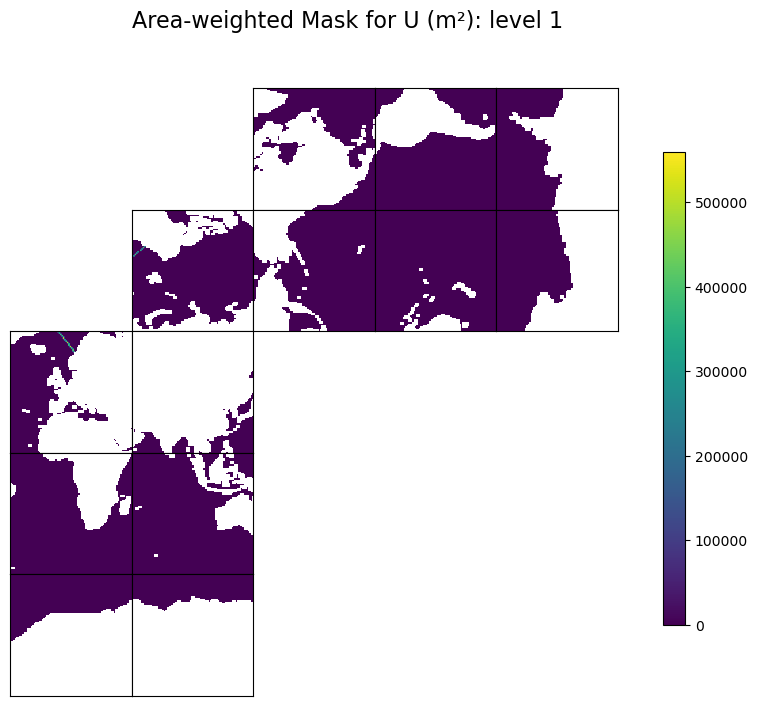

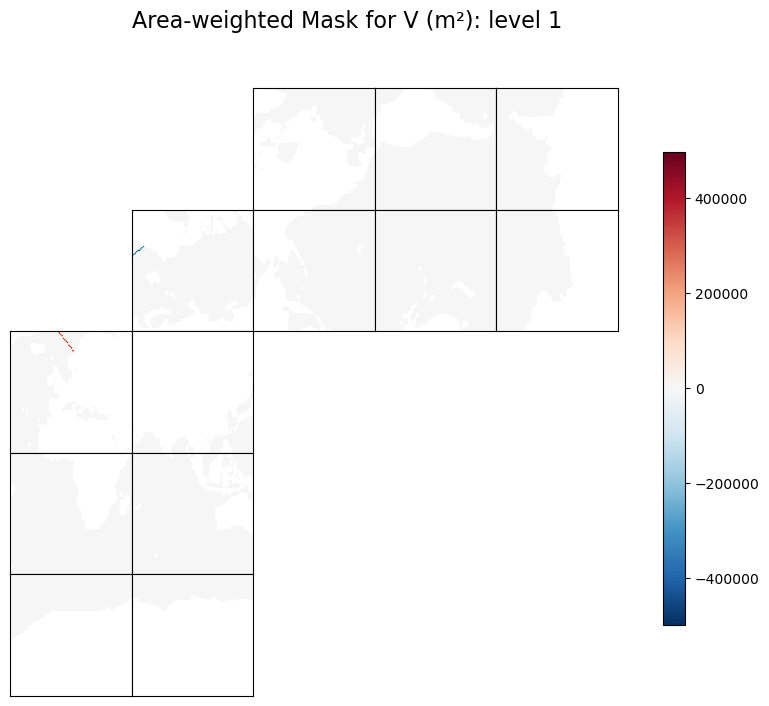

In [24]:
# make a copy and flag land points with NaN for better visualization
# plot the first level 
level = 1 

tmpWa = np.copy(trxWa).astype('>f4')
tmpWa[maskW==0]=np.nan

fig=ecco.plot_tiles(tmpWa[level-1], rotate_to_latlon=True, show_tile_labels=False, show_colorbar=True, less_output=True)
fig[0].suptitle(f'Area-weighted Mask for U (m\u00b2): level {level}', fontsize = 16)

tmpSa = np.copy(trxSa).astype('>f4')
tmpSa[maskS==0]=np.nan
fig=ecco.plot_tiles(tmpSa[level-1], rotate_to_latlon=True, show_tile_labels=False, show_colorbar=True, less_output=True)
fig[0].suptitle(f'Area-weighted Mask for V (m\u00b2): level {level}', fontsize = 16)


### Write masks to files for EMU to use

In [25]:
# Write out the mask to a file to be used by EMU
# First convert the 13x90x90 tile format to the compact formt 1170x90, which is the format that EMU expects for input files.
trxWa_c = ecco.llc_tiles_to_compact(trxWa, less_output=True)
trxSa_c = ecco.llc_tiles_to_compact(trxSa, less_output=True)

# Specify output filename
trxWa_fn = f'trxWa_{pt1[0]:.1f}_{pt2[0]:.1f}_{pt1[1]:.1f}_{pt2[1]:.1f}.bin'
trxSa_fn = f'trxSa_{pt1[0]:.1f}_{pt2[0]:.1f}_{pt1[1]:.1f}_{pt2[1]:.1f}.bin'

# Output the mask
trxWa_c.astype('>f4').tofile(output_dir+'/'+trxWa_fn)
trxSa_c.astype('>f4').tofile(output_dir+'/'+trxSa_fn)

llc_faces_to_compact: data_compact array shape (50, 1170, 90)
llc_faces_to_compact: data_compact array shape (50, 1170, 90)


## Example 5: Create a basin mask for Pacific
This example creates a 2d area-weighted basin mask for Pacific. The procedure is very similar to Example 1, except that we will find the model mask for the Pacific Ocean by using a pre-defined basin index (in ECCOv4-py under the directory binary_data), instead of using user-specified spatial ranges.

### Obtain pre-defined basin index

In [26]:
# ecco.get_basin_mask returns an xarray object
msk_pac_uw_ds = ecco.get_basin_mask('pac', ecco_grid.maskC.isel(k=0), basin_path='/efs_ecco/ECCO/V4/r4/ECCOv4-py/binary_data',
                                less_output=True)
# Save to numpy array: 1 for inside Pacific Ocean and 0 for outside
msk_pac_uw = msk_pac_uw_ds.values

load_binary_array: loading file /efs_ecco/ECCO/V4/r4/ECCOv4-py/binary_data/basins.data
load_binary_array: data array shape  (1170, 90)
load_binary_array: data array type  >f4
llc_compact_to_faces: dims, llc  (1170, 90) 90
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  >f4
shape after reading 
(13, 90, 90)


### Calculate Pacific mask for EMU

In [27]:
# Apply grid cell area weight
# First calculate the total area of wet points in the box, 
# where rA is grid cell area, tmp_msk defines the 0/1 mask for the box, and maskCSurf defines wet/dry points.
area_sum_pac = np.sum(rA*msk_pac_uw*maskCSurf)
# The area weighted mask is just 
mask_pac = rA*msk_pac_uw*maskCSurf/area_sum_pac

### Plot to check by using ECCOv4-py plot_tiles
For plotting purposes, we set land points to NaN so that they appear as white regions.

(<Figure size 900x789 with 17 Axes>,
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ...,  0.,  0.,  0.],
        [nan, nan, nan, ...,  0.,  0.,  0.],
        [nan, nan, nan, ...,  0.,  0.,  0.]]))

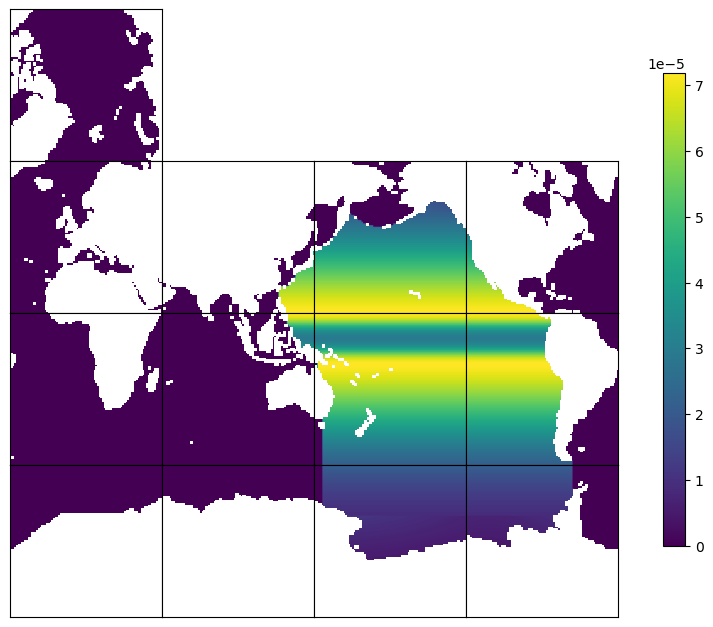

In [28]:
mask_tmpplot_pac = np.copy(mask_pac)
mask_tmpplot_pac[maskCSurf==False] = np.nan
ecco.plot_tiles(mask_tmpplot_pac, rotate_to_latlon=True, layout='latlon', show_tile_labels=False, show_colorbar=True, less_output=True)

The values in the Pacific Ocean are not zero, while those outside Pacific are zero. The mask pattern in the Pacific Ocean is the same as the distribution of model grid cell areas, beacuse the mask is area-weighted. 

### Check the sum of mask and a point outside the Pacific Ocean
In this case, the sum of the mask should be equal to 1. The mask outside the Pacific Ocean is zero. 

In [29]:
print(f'mask at 1,45,50 (tile, j, i): {mask_pac[1,45,45]}')
print(f'Sum of mask: {np.sum(mask_pac)}')

mask at 1,45,50 (tile, j, i): 0.0
Sum of mask: 1.0


### Write the mask to files for EMU to use

In [30]:
# Write out the mask to a file to be used by EMU
# First convert the 13x90x90 to a compact formt 1170x90, which is the format that EMU expects for input files.
mask_pac_c = ecco.llc_tiles_to_compact(mask_pac, less_output=True)

# output filename 
mask_fn_pac = f'mask2d_pac.bin'

# Output the mask
mask_pac_c.astype('>f4').tofile(output_dir+'/'+mask_fn_pac)